# Notebook 3B - Intrinsic Explainability Methods
---

COSCI 222 - Machine Learning 2

*Prepared by Leodegario U. Lorenzo II, updated by Kenneth T. Co*

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.api as sm
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import OLSInfluence, variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson

In this notebook we will cover models that have intrinsic explainability (built-in). We mainly cover:
1. Linear Regression Model
2. Logistic Regression Model

and lastly we will briefly revisit Decision Trees.

# 1.0 Linear Regression Model
---

The most popular method in explanatory modeling is generalized linear models. For **quantitative outcomes**, we call this the linear regression model. In here, we postulate a linear relationship between the mean of the outcome variable and the weighted sum of the feature values, such as:

$$E(Y|\bf{x}) = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_px_p$$

In here, $\beta_0$ is the intercept, or simply the average value of $Y$ given $\bf{x}$ when all the features are set to zero. On the other hand, $\beta_j$'s are the learned coefficients of each feature. Equivalently, the linear model can be expressed by:

$$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_px_p+\epsilon$$

where the $\epsilon \stackrel{iid}{\sim} N(0, \sigma^2)$. This means that the errors we make (i.e., difference between predicted and actual) will follow a normal distribution with mean 0 and some constant variance.
* Having a mean of 0 means that the errors may be negative or positive, small or large, but they should revolve around 0.
* Having a constant variance means that no matter what realization of the $\bf{X}$ is (i.e., feature values), the variance of the error will remain the same.
* Being independently distributed means that any error that we make is not at all related to the errors of the other datapoints. This is a natural result if all our datapoints are independent of each other. 
    * 🤔 What is an example of a dataset wherein the datapoints are naturally related to one another?
    
This error term, also called as the **unexplained error**, is the centerpiece of most of the linear regression's assumptions. 
    
**Sample result:**
<div>
<img src="figures/example_boston.png" width="350"/>
</div>


**Advantages:**
- The biggest advantage of linear regression models is linearity. This is one of the main reasons behind its popularity in research fields such as medicine, sociology, psychology. In these fields, it is usually not enough to predict the outcome, but to make meaningful interventions, one must also **quantify the effect** of a feature on the outcome. This is because **quantified effects are usually more actionable.**
- In practice, we look at two main outputs: (1) the estimated coefficients $\beta_0$ and $\beta_j$'s and (2) their corresponding significance test. The significance test tests the $H_0: \beta_i = 0$.
    * *Segue:* This significance test uses the t-statistic, $\frac{\hat{\beta}-0}{S.E.(\hat{\beta_i})}$. This shows that the significance tests seen on the linear model results rely heavily on the calculated standard error.
    * 🤔 What else can we calculate if we have a $\hat{\beta_i}$ and its corresponding $S.E.(\hat{\beta_i})$?

**Disadvantages:**
- Its greatest weakness is also its linearity assumption. To postulate a strictly linear relationship between the outcome and the features can be too restrictive.
* Verifying that we have a correct model specification (i.e., that our fitted linear model accurately represents the behavior of the outcome) is a tedious, iterative task of verifying and fixing assumptions.

## 1.1 Assumptions

### Linearity

Linear regression forces a linear relationship between the features and the outcome variable. It also assumes that the features  have an additive effect. This is the reason why when we interpret linear regression models, it is easy to isolate the effect of a given feature.

**⚠️ Implications when violated:**
- Violation happens when the relationship between the features and the outcome variable may simply not be linear.
- Violation leads to **biased coefficient estimates**.

**🔎 Detection tools:** 
* **X vs. Y Plot** during EDA
* **Actual vs. Predicted Plot** - scatter plot of actual values of the outcome variable vs. its predicted values. Violation happens when residuals do not follow the diagonal line. What we want is the following:
    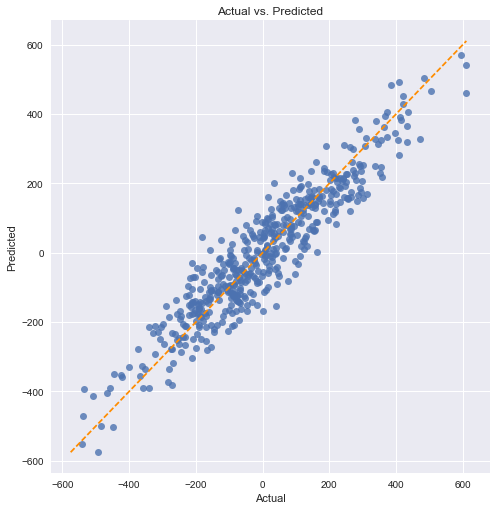
* **Predicted vs. Residual Plot** - scatter plot of predicted values of the outcome variable vs. the residuals. Violation happens when residuals form parabolic or some line. What we want is the following:
    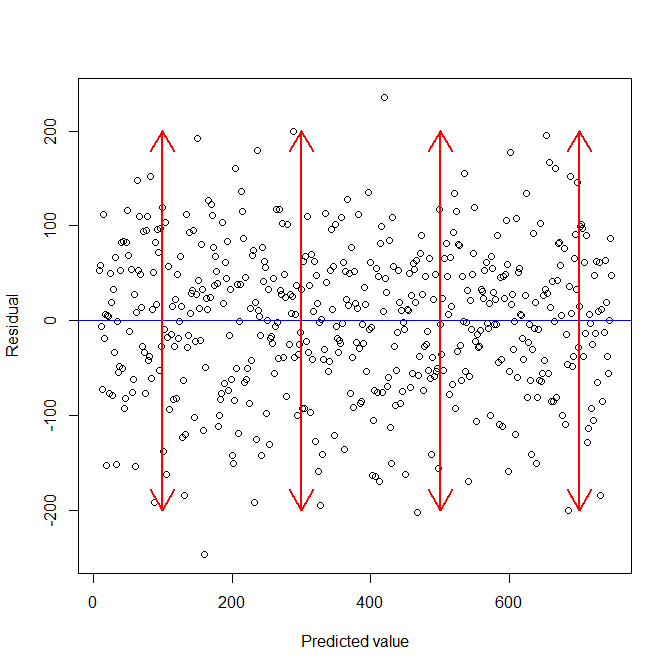
    
**⚒️ Potential fixes:**
* Apply some feature transformations (e.g., polynomial, square root, log-transformation, etc.)
* Add interaction variables

### Homoscedasticity

The variance of the errors is assumed to be constant over the entire feature space (i.e., any feature values). Suppose that the outcome variable is house prices and the feature variable is its floor area. Homoscedasticity means that the estimation errors of the house prices are relatively the same regardless of the house's foor area. 

**⚠️ Implications when violated:**
- Violation happens when the linear model over- or under-predicts the outcome for some segments of the feature space.
- Violation leads to inflated standard errors, and consequently, **misleading p-values and confidence intervals**. Such inflation in the standard errors will not be fixed regardless of how large our sample size is.

**🔎 Detection tools:**
* **Predicted vs. Residual Plot** - scatter plot of predicted values of the outcome variable vs. the residuals. Violation happens when residuals form a funnel shape.
* **Breusch-Pagan Test** - tests $H_0$ that there is homoscedasticity. Violation happens at p-value < some chosen $\alpha$. What we want is high p-values.

**⚒️ Potential fixes:**
* Performing log-transformation on the outcome variable.
* Use bootstrap to get the empirical standard errors, and consequently, p-values and confidence intervals.
* Use methods other than linear regression (OLS) such as weighted least squares (WLS) or robust regression.

### Normality

A common misconception about linear regression is that it assumes that the outcome must be normally distributed. Although a normally distributed outcome variable may lead to ease in satisfying the assumptions, the assumption is actually imposed on the errors.

**⚠️ Implications when violated:**
- Violation happens when the outcome variable is significantly non-normal.
- Violation leads to inflated standard errors, and consequently, **misleading p-values and confidence intervals**. HOWEVER, in contrast to violation of homoscedasticity, having a large sample size actually allows us to ignore non-normality!

**🔎 Detection tools:**
* **QQ Plot** - scatter plot that compares the empirical quantiles from the data and the theoretical quantiles from a normal distribution. Violation happens when the empirical quantiles are not visually aligned with the theoretical quantiles. What we want is the following:

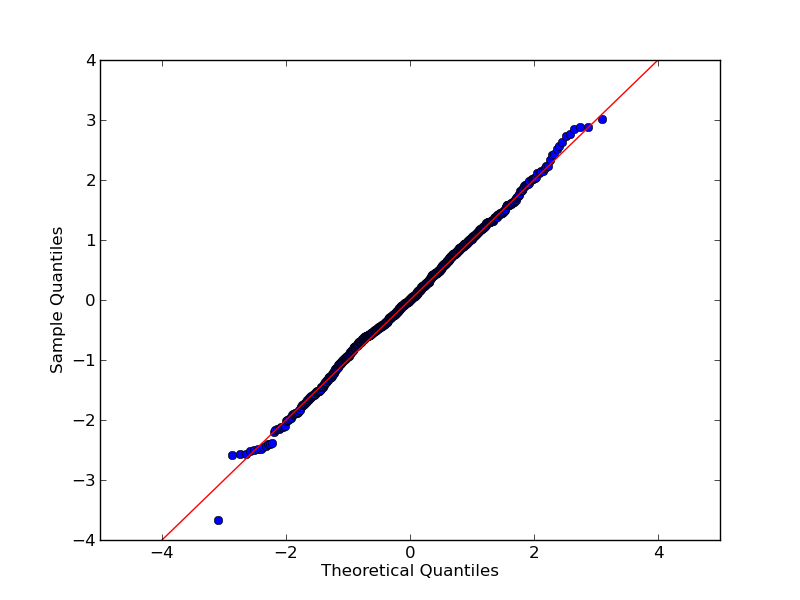

* **Density Plot of Residuals** - distribution plot of the residuals. Violation happens when it is not bell-shaped, and/or when the kurtosis is too high. What we want is the following:
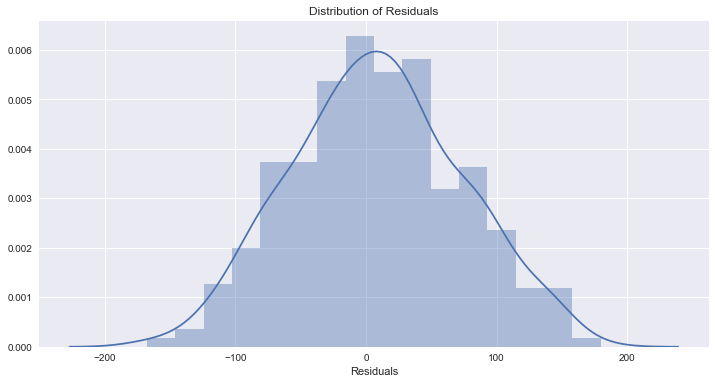

* **Anderson-Darling** or **Jarque-Bera** - tests $H_0$ that the skewness and kurtosis of data matches that of a normal distribution. Violation happens at p-value < some chosen $\alpha$. What we want is high p-values.

**⚒️ Potential fixes:**
* Performing log-transformation on the outcome variable.
* Fixing heteroscedasticity usually also fixes non-normality.
* Invoking ✨ **Central Limit Theorem** ✨. 
    * 🤔 Can you recall the Central Limit Theorem?
    * CLT says that some linear combination of random variables $X_1$, $X_2$, ... $X_n$ will approximate normal distribution as the sample size $n$ increases. In the same way, we can invoke CLT if we look at the error term as some linear combination of all the errors not explained by the fitted model, i.e., $\hat{\epsilon_i} = y_i-\hat{y_i}$. These unexplained errors can come from any distribution, but their linear combination will always approximate normal distribution as the sample size $n$ increases.

### No autocorrelation

The errors are also assumed to be independent, or have no autocorrelation. Autocorrelation is naturally present in time series data or repeated measures of data. 

**⚠️ Implications when violated:**
- Violation happens when the observations in the dataset are not independent. If autocorrelation is present despite independent observations, this suggests missing some information that should be captured by the model. 
- Violation leads to inflated standard errors, and consequently, **misleading p-values and confidence intervals**. Such inflation in the standard errors will not be fixed regardless of how large our sample size is.

**🔎 Detection tools:**
* **Durbin-Watson Test** - a statistic that ranges from 0 to 4. Extreme violation happens value is below 1. What we want is values around 2.

**⚒️ Potential fixes:**
* Add new variables that are currently not present in the model.

### Little to no multicollinearity

Multicollinearity happens when the features have high correlation with each other. This is an assumption that is often overlooked. There is danger in interpreting model coefficients (or feature importance in machine learning models) at the presence of multicollinearity since they lead to wild and unstable estimates. In linear models, beta coefficients cannot be estimated if there is perfect multicollinearity.

**⚠️ Implications when violated:**
- Violation happens when the features are highly correlated with each other.
- Violation leads to wild estimates to the extent that the coefficients may have an opposite direction than they were supposed to have (e.g., have a negative effect on outcome when it's really positive).
- Violation leads to inflated standard errors, and consequently, **misleading p-values and confidence intervals**. Such inflation in the standard errors will not be fixed regardless of how large our sample size is.

**🔎 Detection tools:**
* **Correlation Plot** during EDA
* **Variance Inflation Factor** - measures how much the variance of a given feature is influenced, or inflated, by its interaction with the other features. Extreme violation happens when VIF is above 100. What we want is VIF below 10.

**⚒️ Potential fixes:**
* Dropping variables with high VIF especially if removing them leads to drastically different coefficient estimates.
- 🤔 What is it in your DMW technique that helps decolerrate your features?

## 1.2 Dataset

We'll use the **Boston housing dataset** from the late 1970’s. Here are the variable descriptions for the Boston housing dataset:
 - `ZN`: Proportion of residential land zoned for lots over 25,000 sq.ft.
 - `CHAS`: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
 - `NOX`: Nitric oxides concentration (parts per 10 million)
 - `RM`: Average number of rooms per dwelling
 - `DIS`: Weighted distances to five Boston employment centers
 - `PTRATIO`: Pupil-teacher ratio by town
 - `LSTAT`: % lower status of the population
 - `HousePrice`: House price in $1,000’s

In [2]:
df = pd.read_csv('data/boston.csv')
X = df.drop(['HousePrice'], axis=1)
y = df['HousePrice']

### EDA

Correlation of Features
Checks for: Potential multicollinear features


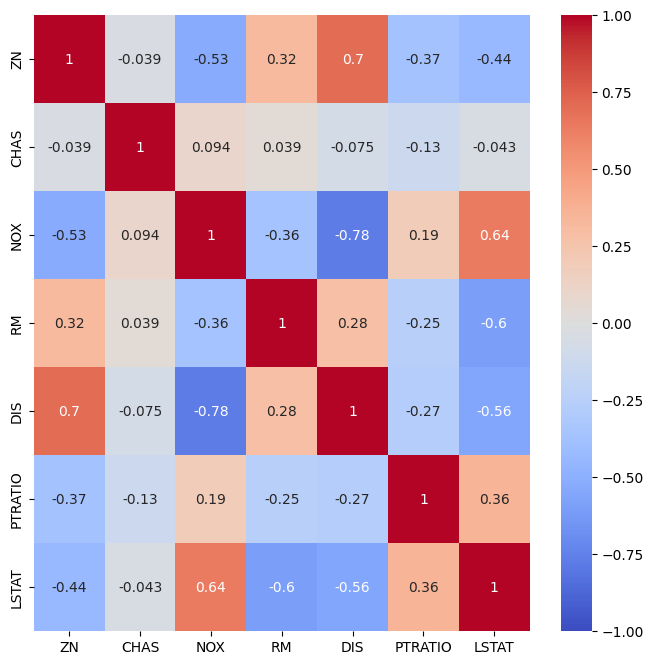

In [3]:
plt.figure(figsize = (8, 8))
sns.heatmap(pd.DataFrame(X, columns=X.columns).corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
print('Correlation of Features')
print('Checks for: Potential multicollinear features')

`NOX` and `DIS` may be multicollinear with a very high negative correlation at 0.78. Dropping features is always left to the judgment of the data scientist.

Scatter Plot of Individual Feature vs. Outcome
Checks for: Potential non-linear features that need to be transformed


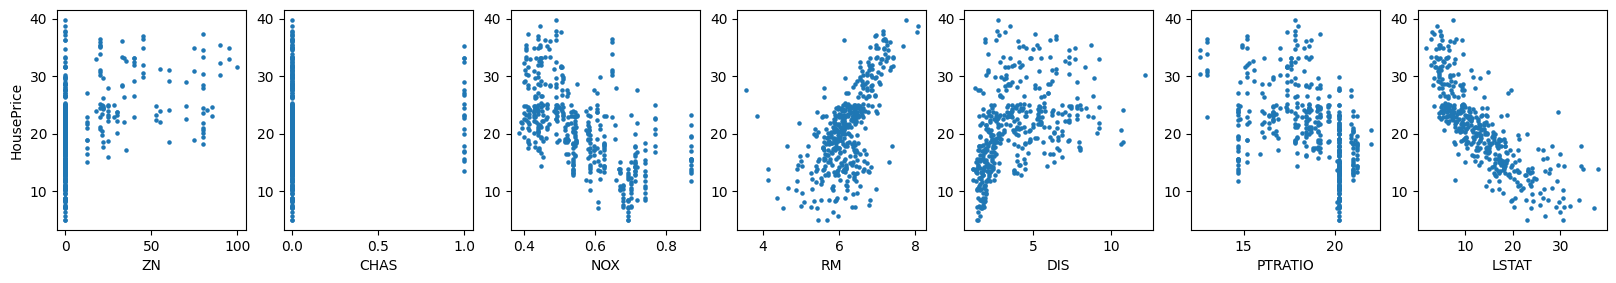

In [4]:
fig, axes = plt.subplots(1, len(X.columns), figsize=(20, 20/len(X.columns)))
for ind, ax in enumerate(axes):
    ax.scatter(X.iloc[:, ind], y, s=5)
    ax.set_xlabel(X.columns[ind])
    if ind == 0:
        ax.set_ylabel(y.name)
print('Scatter Plot of Individual Feature vs. Outcome')
print('Checks for: Potential non-linear features that need to be transformed')

We take note of `DIS`, `PTRATIO`, and `LSTAT`, since they seem to have non-linear relationship with the outcome. These may need transformations later on (e.g., squareroot, square, log).

## 1.3 Fitting Linear Regression Model

### Model 0: All Variables

In [5]:
model0 = smf.ols("HousePrice ~ ZN + CHAS + NOX + RM + DIS + PTRATIO + LSTAT", data=df).fit()

In [6]:
def plot_actual_vs_predicted(model, df, outcome):
    results = model
    
    # Create dataframe of fitted, actual, and residuals
    residuals_df = pd.DataFrame({'predicted': results.fittedvalues,
                           'actual': df[outcome],
                           'residuals': df[outcome]-results.fittedvalues})
    
    # Calculate outlier metrics
    outliers = OLSInfluence(results)
    outliers_df = outliers.summary_frame()[['cooks_d', 'student_resid']]
    outliers_df['cooks_d_outlier'] = np.where(outliers_df['cooks_d'] > (4/residuals_df.shape[0]), 1, 0)
    outliers_df['student_resid_outlier'] = np.where(~outliers_df['student_resid'].between(-3, 3), 1, 0 )
    outliers_df = outliers_df[(outliers_df['cooks_d_outlier']==1) & (outliers_df['student_resid_outlier']==1)]
    print('Viz Tool #1: Actual vs. Predicted')
    print('Checks for: Linearity, Outliers')
    print('What we want to see: Residual points falling along and spread across the diagonal line.')
    print('')
    print('- Residual points forming patterns other than falling along the diagonal line indicate non-linearity.')
    print('- Residual points that deviate from the majority are potential influential observations.')
    print(f"- Potential influential datapoints based on Cook's Distance and Studentized Residual: {list(outliers_df.index)}")
    # Linearity, Outliers: Actual vs. Predicted
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.scatter(residuals_df['actual'], residuals_df['predicted'])
    for x, y, label in zip(residuals_df['actual'], residuals_df['predicted'], df.index):
        if label in outliers_df.index:
            ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points",
                     ha='center', size=8, bbox=dict(boxstyle="round", fc="white", ec="#b0b0b0", lw=1, alpha=0.5))
    line_coords = np.arange(residuals_df.min().min(), residuals_df.max().max())
    ax.plot(line_coords, line_coords, color='darkorange', linestyle='--')
    ax.set_title('Actual vs. Predicted')


def plot_predicted_vs_residual(model, df, outcome):
    results = model
    
    # Create dataframe of fitted, actual, and residuals
    residuals_df = pd.DataFrame({'predicted': results.fittedvalues,
                           'actual': df[outcome],
                           'residuals': df[outcome]-results.fittedvalues})
    
    # Calculate outlier metrics
    outliers = OLSInfluence(results)
    outliers_df = outliers.summary_frame()[['cooks_d', 'student_resid']]
    outliers_df['cooks_d_outlier'] = np.where(outliers_df['cooks_d'] > (4/residuals_df.shape[0]), 1, 0)
    outliers_df['student_resid_outlier'] = np.where(~outliers_df['student_resid'].between(-3, 3), 1, 0 )
    outliers_df = outliers_df[(outliers_df['cooks_d_outlier']==1) & (outliers_df['student_resid_outlier']==1)]
    print('Viz Tool #2: Predicted vs. Residuals')
    print('Checks for: Linearity, Heteroscedasticity, Outliers')
    print('What we want to see: Residual points forming a band along zero.')
    print('')
    print('- Residual points forming a parabolic or diagonal pattern may indicate non-linearity.')
    print('- Residual points forming a funnel shape may indicate heteroscedasticity.')
    print('- Residual points that deviate from the majority are potential influential observations.')
    print(f"- Potential influential datapoints based on Cook's Distance and Studentized Residual: {list(outliers_df.index)}")
    
    # Linearity, Homoscedasticity, Outliers: Predicted vs. Residuals
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.scatter(residuals_df['predicted'], residuals_df['residuals'])
    for x, y, label in zip(residuals_df['predicted'], residuals_df['residuals'], df.index):
        if label in outliers_df.index:
            ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points",
                     ha='center', size=8, bbox=dict(boxstyle="round", fc="white", ec="#b0b0b0", lw=1, alpha=0.5))
    ax.axhline(0, color='darkorange', linestyle='--')
    ax.set_title('Predicted vs. Residuals')

Viz Tool #1: Actual vs. Predicted
Checks for: Linearity, Outliers
What we want to see: Residual points falling along and spread across the diagonal line.

- Residual points forming patterns other than falling along the diagonal line indicate non-linearity.
- Residual points that deviate from the majority are potential influential observations.
- Potential influential datapoints based on Cook's Distance and Studentized Residual: [177, 300, 304, 342]


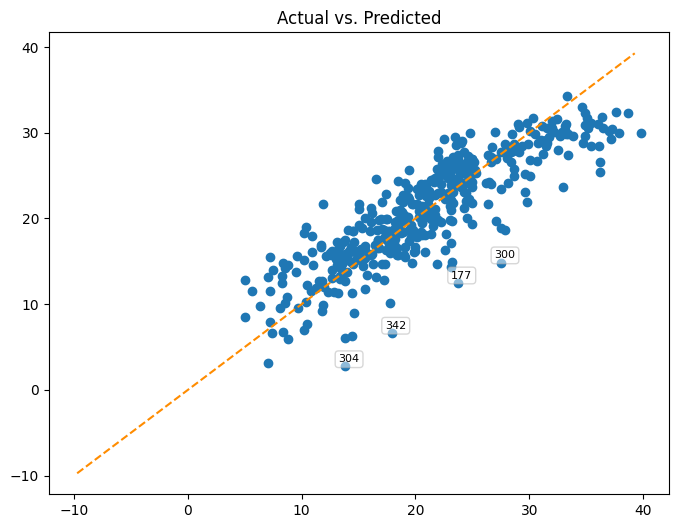

In [7]:
plot_actual_vs_predicted(model0, df, 'HousePrice')

Viz Tool #2: Predicted vs. Residuals
Checks for: Linearity, Heteroscedasticity, Outliers
What we want to see: Residual points forming a band along zero.

- Residual points forming a parabolic or diagonal pattern may indicate non-linearity.
- Residual points forming a funnel shape may indicate heteroscedasticity.
- Residual points that deviate from the majority are potential influential observations.
- Potential influential datapoints based on Cook's Distance and Studentized Residual: [177, 300, 304, 342]


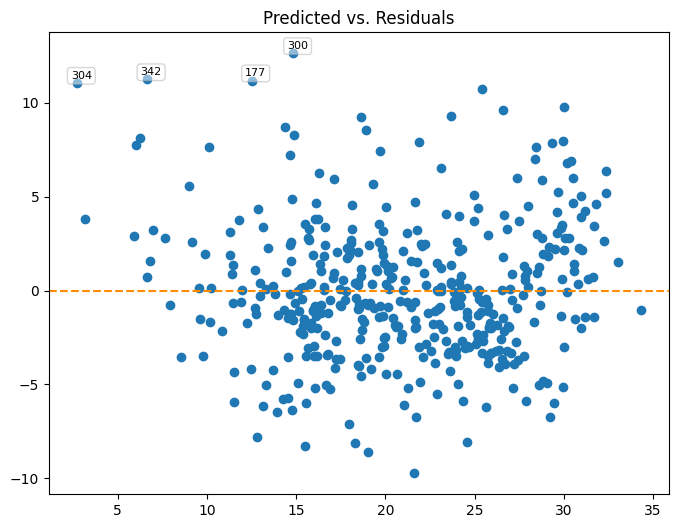

In [8]:
plot_predicted_vs_residual(model0, df, 'HousePrice')

Based on both the Actual vs. Predicted plot and Predicted vs. Residual plot, our dataset does not exhibit a perfect linear relationship. There is also some slight funnel pattern in the plot, which may indicate heteroscedasticity.

⭐ So far, our current model, `model0`, satisfies the following:

❔ Linearity \
❔ Homoscedasticity \
❔ Normality \
❔ No autocorrelation \
❔ Little to no multicollinearity \

First, to fix linearity, we can add polynomial terms or apply nonlinear transformations to the features. We observed in the EDA a while ago that `DIS`, `PTRATIO`, and/or`LSTAT` may need transformations. Let's observe what happened to these visualization tools after applying some feature transformations

### Model 1: Applying feature transformations

**Transformation 1A**
- Log-transform `DIS`, i.e., `np.log(DIS)`
- Log-transform `LSTAT`, i.e., `np.log(LSTAT)`
- Add `PTRATIO**2`

Viz Tool #2: Predicted vs. Residuals
Checks for: Linearity, Heteroscedasticity, Outliers
What we want to see: Residual points forming a band along zero.

- Residual points forming a parabolic or diagonal pattern may indicate non-linearity.
- Residual points forming a funnel shape may indicate heteroscedasticity.
- Residual points that deviate from the majority are potential influential observations.
- Potential influential datapoints based on Cook's Distance and Studentized Residual: [153, 177, 300, 425]


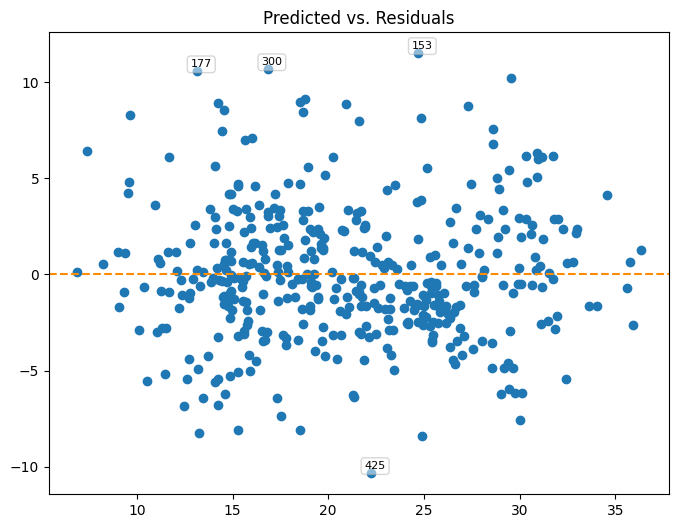

In [9]:
model1a = smf.ols("HousePrice ~ ZN + CHAS + NOX + RM + np.log(DIS) + PTRATIO + I(PTRATIO**2) + np.log(LSTAT)", data=df).fit()

plot_predicted_vs_residual(model1a, df, 'HousePrice')

In [10]:
def test_homo(model):
    print('Hypo Test Tool #1: Breusch-Pagan')
    print('Checks for: Heteroscedasticity')
    print('What we want to see: p-value >= alpha, e.g., 0.05')
    print('')
    print('- p-value < 0.05 indicate heteroscedasticity, i.e., non-constant variance in the error term.')
    
    results = model
    name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
    test = sms.het_breuschpagan(results.resid, results.model.exog)
    print('')
    for text, value in lzip(name, test):
        print(f"{text}: {value}")

In [11]:
test_homo(model1a)

Hypo Test Tool #1: Breusch-Pagan
Checks for: Heteroscedasticity
What we want to see: p-value >= alpha, e.g., 0.05

- p-value < 0.05 indicate heteroscedasticity, i.e., non-constant variance in the error term.

Lagrange multiplier statistic: 28.305582967929578
p-value: 0.00041949951427179295
f-value: 3.7099553049153067
f p-value: 0.00033342488990105554


**Transformation 1B**
- Log-transform `DIS`, i.e., `np.log(DIS)`
- Log-transform `LSTAT`, i.e., `np.log(LSTAT)`

Viz Tool #2: Predicted vs. Residuals
Checks for: Linearity, Heteroscedasticity, Outliers
What we want to see: Residual points forming a band along zero.

- Residual points forming a parabolic or diagonal pattern may indicate non-linearity.
- Residual points forming a funnel shape may indicate heteroscedasticity.
- Residual points that deviate from the majority are potential influential observations.
- Potential influential datapoints based on Cook's Distance and Studentized Residual: [153, 177, 300]


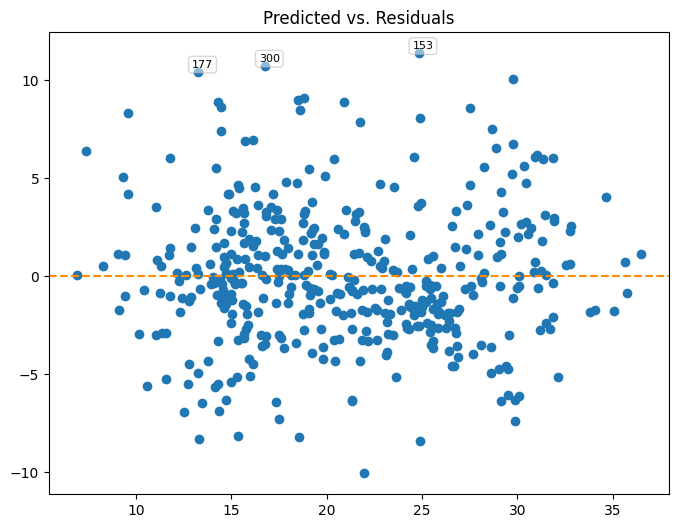

In [12]:
model1b = smf.ols("HousePrice ~ ZN + CHAS + NOX + RM + np.log(DIS) + PTRATIO + np.log(LSTAT)", data=df).fit()

plot_predicted_vs_residual(model1b, df, 'HousePrice')

In [13]:
test_homo(model1b)

Hypo Test Tool #1: Breusch-Pagan
Checks for: Heteroscedasticity
What we want to see: p-value >= alpha, e.g., 0.05

- p-value < 0.05 indicate heteroscedasticity, i.e., non-constant variance in the error term.

Lagrange multiplier statistic: 27.436161819258412
p-value: 0.00027809250386676935
f-value: 4.1105856799673335
f p-value: 0.00022061245911198763


**Transformation 1C**
- Log-transform `DIS`, i.e., `np.log(DIS)`
- Add `PTRATIO**2`

Viz Tool #2: Predicted vs. Residuals
Checks for: Linearity, Heteroscedasticity, Outliers
What we want to see: Residual points forming a band along zero.

- Residual points forming a parabolic or diagonal pattern may indicate non-linearity.
- Residual points forming a funnel shape may indicate heteroscedasticity.
- Residual points that deviate from the majority are potential influential observations.
- Potential influential datapoints based on Cook's Distance and Studentized Residual: [177, 300, 342]


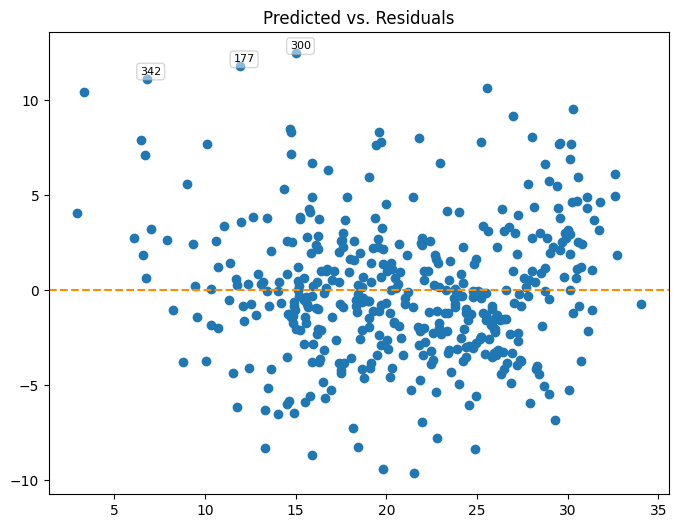

In [14]:
model1c = smf.ols("HousePrice ~ ZN + CHAS + NOX + RM + np.log(DIS) + PTRATIO + I(PTRATIO**2) + LSTAT", data=df).fit()

plot_predicted_vs_residual(model1c, df, 'HousePrice')

In [15]:
test_homo(model1c)

Hypo Test Tool #1: Breusch-Pagan
Checks for: Heteroscedasticity
What we want to see: p-value >= alpha, e.g., 0.05

- p-value < 0.05 indicate heteroscedasticity, i.e., non-constant variance in the error term.

Lagrange multiplier statistic: 35.28845360677071
p-value: 2.3689531243112065e-05
f-value: 4.707848184250128
f p-value: 1.537568111345549e-05


**Transformation 1D**
- Log-transform `LSTAT`, i.e., `np.log(LSTAT)`
- Add `PTRATIO**2`

Viz Tool #2: Predicted vs. Residuals
Checks for: Linearity, Heteroscedasticity, Outliers
What we want to see: Residual points forming a band along zero.

- Residual points forming a parabolic or diagonal pattern may indicate non-linearity.
- Residual points forming a funnel shape may indicate heteroscedasticity.
- Residual points that deviate from the majority are potential influential observations.
- Potential influential datapoints based on Cook's Distance and Studentized Residual: [152, 153, 300, 425]


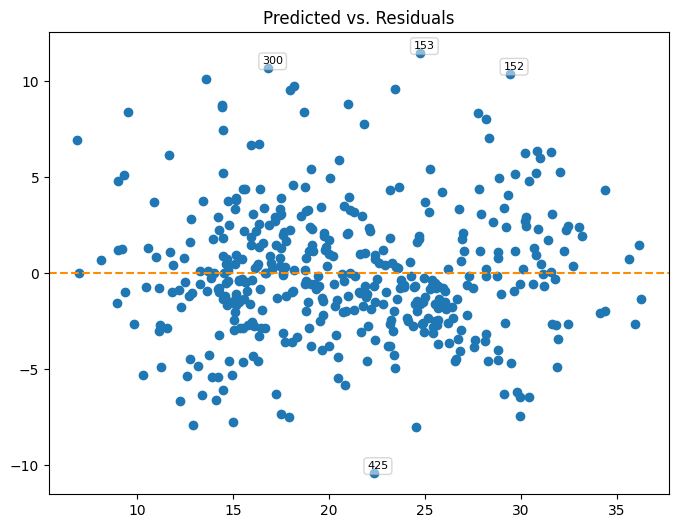

In [16]:
model1d = smf.ols("HousePrice ~ ZN + CHAS + NOX + RM + DIS + PTRATIO + I(PTRATIO**2) + np.log(LSTAT)", data=df).fit()

plot_predicted_vs_residual(model1d, df, 'HousePrice')

In [17]:
test_homo(model1d)

Hypo Test Tool #1: Breusch-Pagan
Checks for: Heteroscedasticity
What we want to see: p-value >= alpha, e.g., 0.05

- p-value < 0.05 indicate heteroscedasticity, i.e., non-constant variance in the error term.

Lagrange multiplier statistic: 16.090068367481127
p-value: 0.04110895038480252
f-value: 2.046046579829727
f p-value: 0.040007893070001445


⭐ So far, our current model, `model1d`, satisfies the following:

✅ Linearity \
❔ Homoscedasticity \
❔ Normality \
❔ No autocorrelation \
❔ Little to no multicollinearity \

We have seen that simply applying feature transformations alone might have corrected non-linearity, but not heteroscedasticity. Another feature engineering option is to include interaction terms.

### Model 2: Adding interaction terms

Recall the scatterplot:

Scatter Plot of Individual Feature vs. Outcome
Checks for: Potential non-linear features that need to be transformed


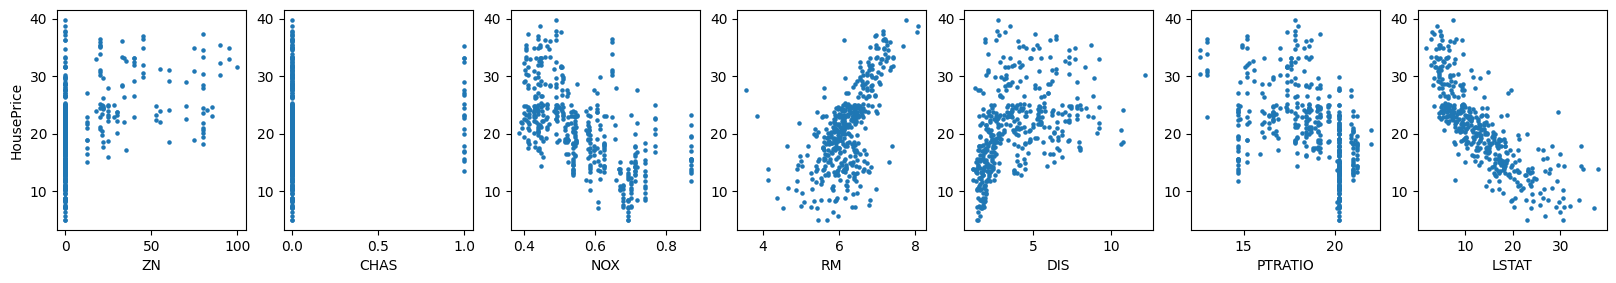

In [18]:
fig, axes = plt.subplots(1, len(X.columns), figsize=(20, 20/len(X.columns)))
for ind, ax in enumerate(axes):
    ax.scatter(X.iloc[:, ind], y, s=5)
    ax.set_xlabel(X.columns[ind])
    if ind == 0:
        ax.set_ylabel(y.name)
print('Scatter Plot of Individual Feature vs. Outcome')
print('Checks for: Potential non-linear features that need to be transformed')

A sign that adding interaction is needed when there is a separate cluster of datapoints in the plot. One should try to attempt find the categorical variable that separates these datapoints.

By taking quick averages below, we could see that the average of `ZN` is very different when `CHAS=0` or `CHAS=1`. Consequently, this could suggest that the regression line should be different for datapoints having `CHAS=0` vs `CHAS=1`. To make this happen, we can simply add an interaction between `ZN` and `CHAS`.

In [19]:
df.groupby('CHAS')[['ZN', 'NOX', 'RM', 'DIS', 'PTRATIO', 'LSTAT']].mean()

,ZN,NOX,RM,DIS,PTRATIO,LSTAT
CHAS,,,,,,
0.0,11.741975,0.555990,6.194644,3.872045,18.604198,13.393852
1.0,7.619048,0.608286,6.305048,3.119505,17.319048,11.964762


**Transformation 1D**
- Log-transform `LSTAT`, i.e., `np.log(LSTAT)`
- Add `PTRATIO**2`

**Transformation 2:**
- Add interaction term `ZN*CHAS`

Viz Tool #2: Predicted vs. Residuals
Checks for: Linearity, Heteroscedasticity, Outliers
What we want to see: Residual points forming a band along zero.

- Residual points forming a parabolic or diagonal pattern may indicate non-linearity.
- Residual points forming a funnel shape may indicate heteroscedasticity.
- Residual points that deviate from the majority are potential influential observations.
- Potential influential datapoints based on Cook's Distance and Studentized Residual: [152, 153, 300, 425]


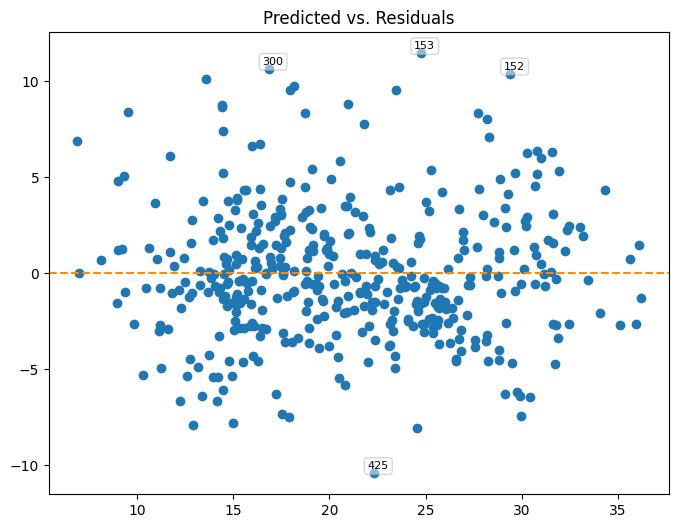

In [20]:
model2 = smf.ols("HousePrice ~ ZN + CHAS + ZN*CHAS + NOX + RM + DIS + PTRATIO + I(PTRATIO**2) + np.log(LSTAT)", data=df).fit()

plot_predicted_vs_residual(model2, df, 'HousePrice')

In [21]:
test_homo(model2)

Hypo Test Tool #1: Breusch-Pagan
Checks for: Heteroscedasticity
What we want to see: p-value >= alpha, e.g., 0.05

- p-value < 0.05 indicate heteroscedasticity, i.e., non-constant variance in the error term.

Lagrange multiplier statistic: 16.29015711943854
p-value: 0.06106407919303373
f-value: 1.8378061340086191
f p-value: 0.059816559544691256


⭐ So far, our current model, `model2`, satisfies the following:

✅ Linearity \
✅ Homoscedasticity \
❔ Normality \
❔ Autocorrelation \
❔ Little to no multicollinearity \

As discussed a while ago, satisfying homoscedasticity goes hand-in-hand with satisfying normality. Let's check for normality

In [22]:
def plot_resid_dist(model, df, outcome):
    results = model

    # Create dataframe of fitted, actual, and residuals
    residuals_df = pd.DataFrame({'predicted': results.fittedvalues,
                                 'actual': df[outcome],
                                 'residuals': df[outcome]-results.fittedvalues})
    
    print('Viz Tool #3: Normality Plots')
    print('Checks for: Normality')
    print('What we want to see in QQ Plot: Residual points following the diagonal line.')
    print("What we want to see in distribution plot: Flat, bell-shaped curve.")
    print('')
    print("- Residual points not fully lining along the QQ's plot diagonal line may indicate non-normality.")
    print("- Residual distribution that is skewed and/or with high kurtosis may indicate non-normality.")
    
    # PLotting QQ Plot
    fig, axes = plt.subplots(1, 2, figsize=(16, 5))
    stats.probplot(residuals_df['residuals'], plot=axes[0], fit=True)
    axes[0].set_title('Q-Q Plot of Residuals')

    # Plotting residuals distribution
    sns.kdeplot(residuals_df['residuals'], ax=axes[1])
    axes[1].set_title('Distribution of Residuals')

def test_normal(model):
    print('Hypo Test Tool #2: Anderson-Darling and Jarque-Bera')
    print('Checks for: Normality')
    print('What we want to see: p-value >= alpha, e.g., 0.05')
    print('')
    print('- p-value < 0.05 indicate non-normality.')
    
    results = model
    name = ['Anderson-Darling', 'p-value']
    test = sms.normal_ad(results.resid)
    print('')
    for text, value in lzip(name, test):
        print(f"{text}: {value}")

    name = ["Jarque-Bera", "p-value", "skewness", "kurtosis"]
    test = sms.jarque_bera(results.resid)
    print('')
    for text, value in lzip(name, test):
        print(f"{text}: {value}")

#     name = ["KS", "p-value"]
#     test = sms.diagnostic.kstest_normal(df[outcome])
#     display(lzip(name, test))

Viz Tool #3: Normality Plots
Checks for: Normality
What we want to see in QQ Plot: Residual points following the diagonal line.
What we want to see in distribution plot: Flat, bell-shaped curve.

- Residual points not fully lining along the QQ's plot diagonal line may indicate non-normality.
- Residual distribution that is skewed and/or with high kurtosis may indicate non-normality.


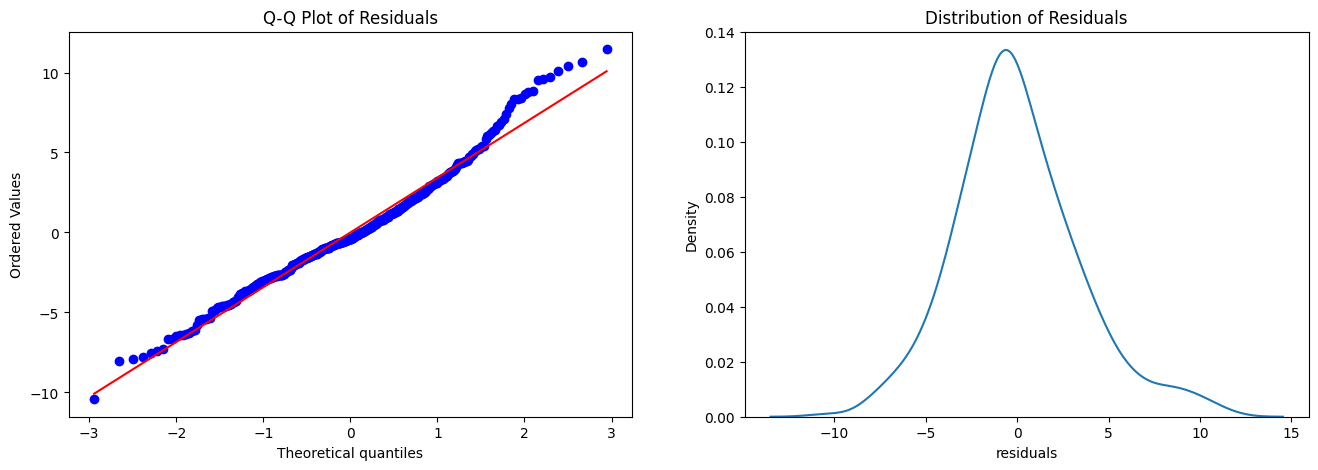

In [23]:
plot_resid_dist(model2, df, 'HousePrice')

In [24]:
test_normal(model2)

Hypo Test Tool #2: Anderson-Darling and Jarque-Bera
Checks for: Normality
What we want to see: p-value >= alpha, e.g., 0.05

- p-value < 0.05 indicate non-normality.

Anderson-Darling: 2.360344094385141
p-value: 5.551719189924911e-06

Jarque-Bera: 26.153369262242187
p-value: 2.09347617687202e-06
skewness: 0.47470798918025225
kurtosis: 3.756332304112811


Unfortunately, even though our model satisfies homoscedasticity, it still doesn't satisfy normality. To fix, normality, a common approach is to log-transform our outcome variable, which we still haven't done yet. Let's see if this fixes our problem.

### Model 3: Log-transforming the outcome

Viz Tool #3: Normality Plots
Checks for: Normality
What we want to see in QQ Plot: Residual points following the diagonal line.
What we want to see in distribution plot: Flat, bell-shaped curve.

- Residual points not fully lining along the QQ's plot diagonal line may indicate non-normality.
- Residual distribution that is skewed and/or with high kurtosis may indicate non-normality.


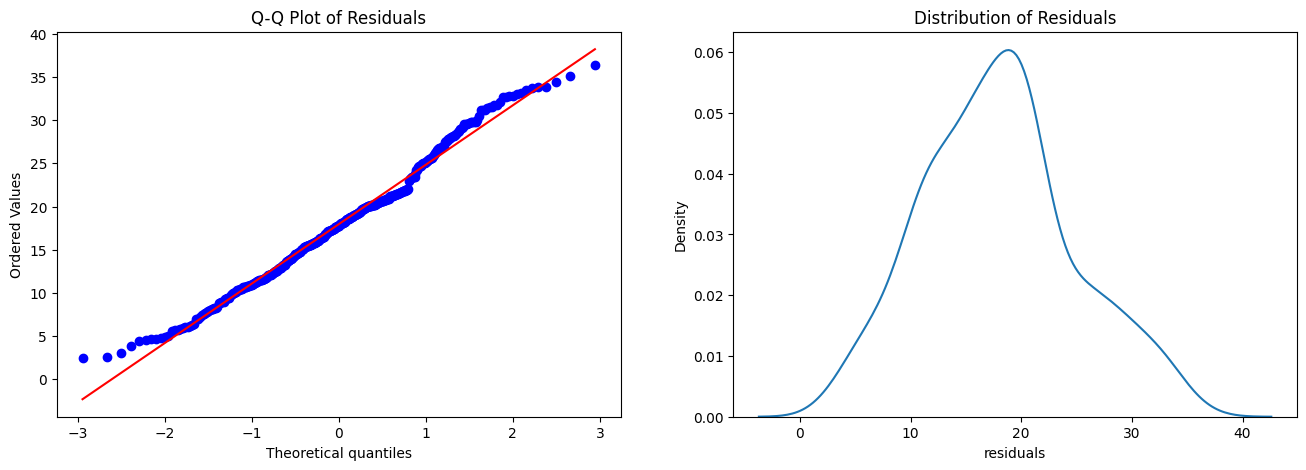

In [25]:
model3 = smf.ols("np.log(HousePrice) ~ ZN + CHAS + ZN*CHAS + NOX + RM + DIS + PTRATIO + PTRATIO**2 + np.log(LSTAT)", data=df).fit()

plot_resid_dist(model3, df, 'HousePrice')

In [26]:
test_normal(model3)

Hypo Test Tool #2: Anderson-Darling and Jarque-Bera
Checks for: Normality
What we want to see: p-value >= alpha, e.g., 0.05

- p-value < 0.05 indicate non-normality.

Anderson-Darling: 3.706264321096114
p-value: 2.935249170691793e-09

Jarque-Bera: 124.29463959510066
p-value: 1.0227322405724734e-27
skewness: -0.6183100114475647
kurtosis: 5.339505466063519


Applying log-transformation made the results worse. However, we will not torment ourselves any further because we can invoke the power of ✨ **Central Limit Theorem** ✨. In practice, the assumption of normality is inessential with large enough sample size [3][4]. Thus, by far, we go back to `model2`.

⭐ So far, our current model, `model2`, satisfies the following:

✅ Linearity \
✅ Homoscedasticity \
✅ Normality (due to CLT) \
❔ Autocorrelation \
❔ Little to no multicollinearity \

Let's now check for autocorrelation.

In [27]:
def test_autocorr(model):
    print('Hypo Test Tool #3: Durbin-Watson')
    print('Checks for: Autocorrelation')
    print('What we want to see: Durbin Watson statisic ranges from 0 to 4. We want values close to 2.')
    print('')
    print('- Values below 2 indicates potential positive autocorrelation.')
    print('- Values above 2 indicates potential negative autocorrelation.')
    print('- Values below 1 is extremely concerning.')
    
    results = model
    name = 'Durbin-Watson'
    test = durbin_watson(results.resid)
    print('')
    print(f"{name}: {test}")

In [28]:
test_autocorr(model2)

Hypo Test Tool #3: Durbin-Watson
Checks for: Autocorrelation
What we want to see: Durbin Watson statisic ranges from 0 to 4. We want values close to 2.

- Values below 2 indicates potential positive autocorrelation.
- Values above 2 indicates potential negative autocorrelation.
- Values below 1 is extremely concerning.

Durbin-Watson: 1.121593051230379


Since there is no hard rule for Durbin-Watson, we will argue that the result that we got is not extremely concerning. To further improve this statistic, the approach is to add more variables which we currently do not have at hand.

⭐ By far, our current model, `model2`, satisfies the following:

✅ Linearity \
✅ Homoscedasticity \
✅ Normality (due to CLT) \
✅ No autocorrelation \
❔ Little to no multicollinearity \

Let's now check for presence of multicollinearity among our chosen features.

In [29]:
def test_vif(df, outcome):
    print('Hypo Test Tool #4: Variance Inflation Factor (VIF)')
    print('Checks for: Multicollinearity')
    print('What we want to see: VIF values less than 100.')
    print('')
    print('- Values above 10 indicate potential multicollinearity among these features.')
    print('- Values above 100 indicate definite multicollinearity among these features.')
    print('')
    
    X, y = df.drop(outcome, axis=1), df[outcome]
    feature_names = X.columns

    VIF = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
    for idx, vif in enumerate(VIF):
        print('{0}: {1}'.format(feature_names[idx], vif))

    # Gathering and printing total cases of possible or definite multicollinearity
    possible_multicollinearity = sum([1 for vif in VIF if vif > 10])
    definite_multicollinearity = sum([1 for vif in VIF if vif > 100])

In [30]:
test_vif(df, 'HousePrice')

Hypo Test Tool #4: Variance Inflation Factor (VIF)
Checks for: Multicollinearity
What we want to see: VIF values less than 100.

- Values above 10 indicate potential multicollinearity among these features.
- Values above 100 indicate definite multicollinearity among these features.

ZN: 2.660826708223745
CHAS: 1.0963178763875414
NOX: 51.11726498246791
RM: 79.92238453277002
DIS: 11.452160142955792
PTRATIO: 73.67557647481088
LSTAT: 10.3005713595538


### Model 4: Removing multicollinear features

Since no variables have VIF above 100, but `PTRATIO` and `RM` have considerably high VIF. If removing these features lead to drastic change in our beta coefficients -- especially the signs -- then we have to consider dropping one of them.

By running a model below without `RM`, it appears that the magnitude remains similar and all directions remain unchanged. We can keep `RM` in our model.

In [31]:
model4a = smf.ols("HousePrice ~ ZN + CHAS + ZN*CHAS + NOX + DIS + PTRATIO + I(PTRATIO**2) + np.log(LSTAT)", data=df).fit()

model_comparison = model4a
model_names = ['model2', 'model4a (without RM)']
common_features = set(model2.params.index) & set(model_comparison.params.index)
pd.concat([model2.params[common_features], model_comparison.params[common_features]], keys=model_names, axis=1)

/var/folders/d_/sgh2ll4x4h9crgp9d9j827lm0000gn/T/ipykernel_34986/3773217977.py:6: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  pd.concat([model2.params[common_features], model_comparison.params[common_features]], keys=model_names, axis=1)
/var/folders/d_/sgh2ll4x4h9crgp9d9j827lm0000gn/T/ipykernel_34986/3773217977.py:6: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  pd.concat([model2.params[common_features], model_comparison.params[common_features]], keys=model_names, axis=1)


,model2,model4a (without RM)
ZN:CHAS,0.023596,0.033906
np.log(LSTAT),-7.359428,-8.690638
NOX,-17.617411,-18.233546
PTRATIO,-2.239612,-2.946329
I(PTRATIO ** 2),0.040745,0.060467
DIS,-0.742042,-0.832888
CHAS,1.404543,1.434701
ZN,-0.004662,-0.001566
Intercept,66.893056,88.993655


This time, `PTRATIO` has two components: the main effect, `PTRATIO` and the squared effect `PTRATIO**2`. Let's try removing (1) both and (2) `PTRATIO**2` only and see what happens to the coefficients.

In [32]:
model4b = smf.ols("HousePrice ~ ZN + CHAS + ZN*CHAS + NOX + DIS + RM + np.log(LSTAT)", data=df).fit()

model_comparison = model4b
model_names = ['model2', 'model4b (without PTRATIO and PTRATIO**2)']
common_features = set(model2.params.index) & set(model_comparison.params.index)
pd.concat([model2.params[common_features], model_comparison.params[common_features]], keys=model_names, axis=1)

/var/folders/d_/sgh2ll4x4h9crgp9d9j827lm0000gn/T/ipykernel_34986/361547881.py:6: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  pd.concat([model2.params[common_features], model_comparison.params[common_features]], keys=model_names, axis=1)
/var/folders/d_/sgh2ll4x4h9crgp9d9j827lm0000gn/T/ipykernel_34986/361547881.py:6: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  pd.concat([model2.params[common_features], model_comparison.params[common_features]], keys=model_names, axis=1)


,model2,model4b (without PTRATIO and PTRATIO**2)
RM,1.930416,2.031694
ZN:CHAS,0.023596,-0.026493
np.log(LSTAT),-7.359428,-8.297940
NOX,-17.617411,-14.187236
DIS,-0.742042,-0.721187
CHAS,1.404543,2.581884
ZN,-0.004662,0.018454
Intercept,66.893056,38.911657


In [33]:
model4c = smf.ols("HousePrice ~ ZN + CHAS + ZN*CHAS + NOX + DIS + RM + PTRATIO + np.log(LSTAT)", data=df).fit()

model_comparison = model4c
model_names = ['model2', 'model4c (without PTRATIO**2)']
common_features = set(model2.params.index) & set(model_comparison.params.index)
pd.concat([model2.params[common_features], model_comparison.params[common_features]], keys=model_names, axis=1)

/var/folders/d_/sgh2ll4x4h9crgp9d9j827lm0000gn/T/ipykernel_34986/3724239721.py:6: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  pd.concat([model2.params[common_features], model_comparison.params[common_features]], keys=model_names, axis=1)
/var/folders/d_/sgh2ll4x4h9crgp9d9j827lm0000gn/T/ipykernel_34986/3724239721.py:6: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  pd.concat([model2.params[common_features], model_comparison.params[common_features]], keys=model_names, axis=1)


,model2,model4c (without PTRATIO**2)
RM,1.930416,1.960684
ZN:CHAS,0.023596,0.021573
np.log(LSTAT),-7.359428,-7.304761
NOX,-17.617411,-16.905915
PTRATIO,-2.239612,-0.802793
DIS,-0.742042,-0.748604
CHAS,1.404543,1.307551
ZN,-0.004662,-0.002150
Intercept,66.893056,53.722487


It appears that adding the squared term `PTRATIO**2` added unncessary noise to our model. Since removing it did not lead to drastic change in the coefficients, let's keep `PTRATIO` but drop `PTRATIO**2`.This shows that **over-engineering features may negatively impact our modeling process** if the goal is explanatory modeling. It is best to let the related literature and domain experts guide you to know which features to add.

### Final Model
Our best model so far is now `model4c`. Let's rerun all the visualizations and test of assumptions and see if they are still satisfied.

#### ✅ Linearity

Viz Tool #1: Actual vs. Predicted
Checks for: Linearity, Outliers
What we want to see: Residual points falling along and spread across the diagonal line.

- Residual points forming patterns other than falling along the diagonal line indicate non-linearity.
- Residual points that deviate from the majority are potential influential observations.
- Potential influential datapoints based on Cook's Distance and Studentized Residual: [152, 153, 300]


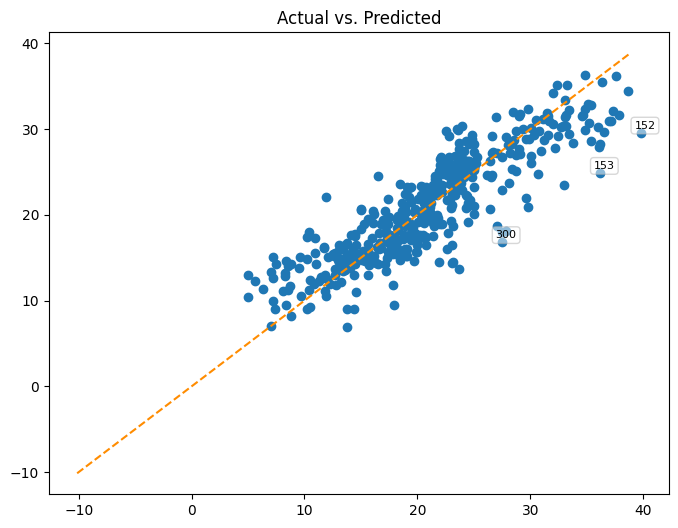

In [34]:
plot_actual_vs_predicted(model4c, df, 'HousePrice')

Viz Tool #2: Predicted vs. Residuals
Checks for: Linearity, Heteroscedasticity, Outliers
What we want to see: Residual points forming a band along zero.

- Residual points forming a parabolic or diagonal pattern may indicate non-linearity.
- Residual points forming a funnel shape may indicate heteroscedasticity.
- Residual points that deviate from the majority are potential influential observations.
- Potential influential datapoints based on Cook's Distance and Studentized Residual: [152, 153, 300]


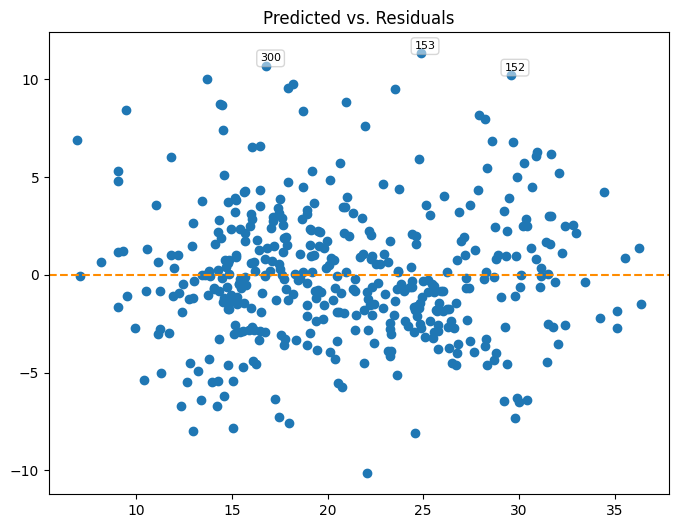

In [35]:
plot_predicted_vs_residual(model4c, df, 'HousePrice')

#### ✅ Homoscedasticity

In [36]:
test_homo(model4c)

Hypo Test Tool #1: Breusch-Pagan
Checks for: Heteroscedasticity
What we want to see: p-value >= alpha, e.g., 0.05

- p-value < 0.05 indicate heteroscedasticity, i.e., non-constant variance in the error term.

Lagrange multiplier statistic: 15.207138145669612
p-value: 0.05524074287174662
f-value: 1.929615018783152
f p-value: 0.05416502860787633


#### ✅ Normality (via CLT)

Viz Tool #3: Normality Plots
Checks for: Normality
What we want to see in QQ Plot: Residual points following the diagonal line.
What we want to see in distribution plot: Flat, bell-shaped curve.

- Residual points not fully lining along the QQ's plot diagonal line may indicate non-normality.
- Residual distribution that is skewed and/or with high kurtosis may indicate non-normality.


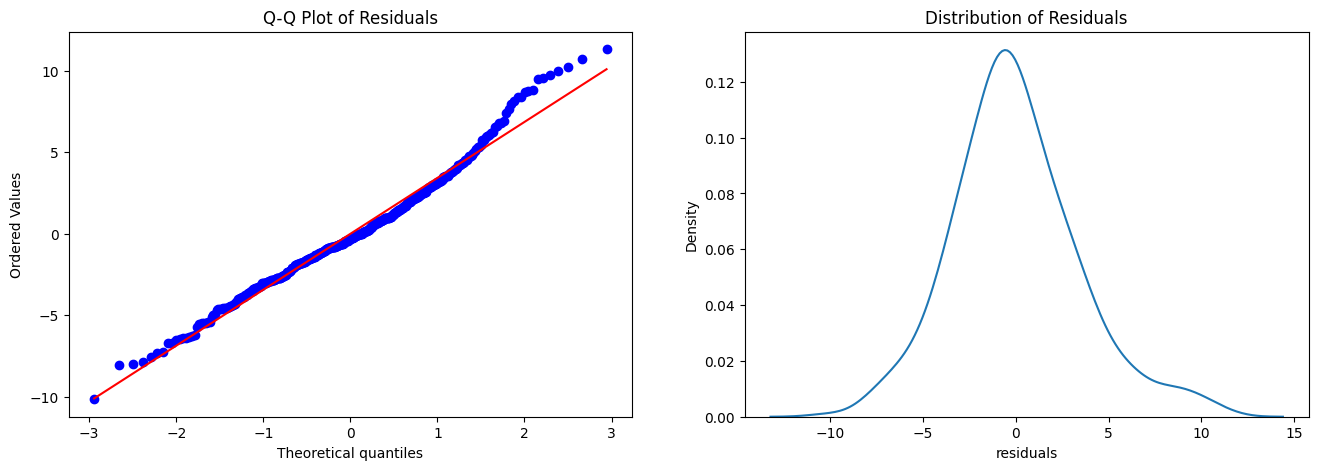

In [37]:
plot_resid_dist(model4c, df, 'HousePrice')

In [38]:
test_normal(model4c)

Hypo Test Tool #2: Anderson-Darling and Jarque-Bera
Checks for: Normality
What we want to see: p-value >= alpha, e.g., 0.05

- p-value < 0.05 indicate non-normality.

Anderson-Darling: 2.1486732524562058
p-value: 1.8299314911738e-05

Jarque-Bera: 23.608030667612468
p-value: 7.474485026727414e-06
skewness: 0.45877300249641606
kurtosis: 3.698669611109996


#### ✅ No autocorrelation

In [39]:
test_autocorr(model4c)

Hypo Test Tool #3: Durbin-Watson
Checks for: Autocorrelation
What we want to see: Durbin Watson statisic ranges from 0 to 4. We want values close to 2.

- Values below 2 indicates potential positive autocorrelation.
- Values above 2 indicates potential negative autocorrelation.
- Values below 1 is extremely concerning.

Durbin-Watson: 1.1119058428065767


#### ✅ Little to no multicollinearity

In [40]:
test_vif(df, 'HousePrice')

Hypo Test Tool #4: Variance Inflation Factor (VIF)
Checks for: Multicollinearity
What we want to see: VIF values less than 100.

- Values above 10 indicate potential multicollinearity among these features.
- Values above 100 indicate definite multicollinearity among these features.

ZN: 2.660826708223745
CHAS: 1.0963178763875414
NOX: 51.11726498246791
RM: 79.92238453277002
DIS: 11.452160142955792
PTRATIO: 73.67557647481088
LSTAT: 10.3005713595538


We have already verified the VIF results a while ago that removing `RM` and `PTRATIO` in our model did not result to drastic change in the estimated coefficients. 

### `model0` vs. Final Model

Let's check for how the relative goodness-of-fit measures changed from our very first model (without checking for assumptions) vs. our final model (with assumptions satisfied). These are the adjusted $R^2$, log-likelihood, AIC, and BIC.

✅ Higher adjusted $R^2$ \
✅ Higher log likelihood \
✅ Lower AIC \
✅ Lower BIC

In [41]:
model0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             HousePrice   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     172.3
Date:                Sat, 06 Apr 2024   Prob (F-statistic):          6.01e-119
Time:                        14:23:46   Log-Likelihood:                -1154.0
No. Observations:                 426   AIC:                             2324.
Df Residuals:                     418   BIC:                             2356.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.6535      3.767     11.324      0.000      35.249      50.058
ZN             0.0206      0.011      1.836      0.067      -0.001       0.043
CHAS           1.4180      0.839      1.691      0.092      -0.231       3.067
NOX          -19.6768      2.599     -7.570      0.000     -24.786     -14.567
RM             2.3247      0.372      6.246      0.000       1.593       3.056
DIS           -0.8666      0.156     -5.545      0.000      -1.174      -0.559
PTRATIO       -0.8477      0.096     -8.851      0.000      -1.036      -0.659
LSTAT         -0.4815      0.038    -12.508      0.000      -0.557      -0.406
==============================================================================
Omnibus:                       25.105   Durbin-Watson:                   1.128
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.411
Skew:                           0.543   Prob(JB):                     4.11e-07
Kurtosis:                       3.691   Cond. No.                         680.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
model4c.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             HousePrice   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     173.5
Date:                Sat, 06 Apr 2024   Prob (F-statistic):          1.56e-127
Time:                        14:23:46   Log-Likelihood:                -1131.0
No. Observations:                 426   AIC:                             2280.
Df Residuals:                     417   BIC:                             2316.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        53.7225      3.770     14.249      0.000      46.311      61.134
ZN               -0.0022      0.011     -0.200      0.842      -0.023       0.019
CHAS              1.3076      0.903      1.448      0.148      -0.468       3.083
ZN:CHAS           0.0216      0.054      0.399      0.690      -0.085       0.128
NOX             -16.9059      2.512     -6.730      0.000     -21.844     -11.968
DIS              -0.7486      0.149     -5.038      0.000      -1.041      -0.456
RM                1.9607      0.356      5.514      0.000       1.262       2.660
PTRATIO          -0.8028      0.092     -8.769      0.000      -0.983      -0.623
np.log(LSTAT)    -7.3048      0.492    -14.846      0.000      -8.272      -6.338
==============================================================================
Omnibus:                       20.161   Durbin-Watson:                   1.112
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.608
Skew:                           0.459   Prob(JB):                     7.47e-06
Kurtosis:                       3.699   Cond. No.                         669.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<div class="alert alert-block alert-info">

# ⚠️ Checkpoint ⚠️
In the next 5 minutes, check with your LT your own understanding of what we did from Model Version 0 to the Final Version. What is the relevance of each iteration we made?
</div>

## 1.4 Interpretation

### Global Interpretation

$$\hat{y} = 53.7225 - 0.0022*ZN + 1.3076*CHAS - 0.0216*ZN\_CHAS - 16.9059*NOX - 0.7486*DIS + 1.9607*RM - 0.8028*PTRATIO -7.3048*log\_LSTAT$$

**Holding all other variables constant** (i.e., the following behaviors are true among subset of the population who have the same values for the rest of the features),

$53.7225$
* The average house price in Boston is $\$53.7225$ in areas with no residential land zones of size 25,000 sq. ft., no non-retail businesses in town, far away from Charles River, clean air, no rooms per dwelling, no schools in town, and no citizens from the lower income classes.

$53.7225 - 0.0022*ZN + 1.3076*CHAS - 0.0216*ZN\_CHAS$
* For houses bound to Charles River (`CHAS=1`), the average house price is $(53.7225 + 1.3076) + (-0.0022-0.0216)*ZN = 55.0301-0.0238*ZN$. This means that every percentage increase of residential land zone of over 25,000 in the area has a $-0.0238$ change in house price.
* For houses far away from the Charles River (`CHAS=0`), the average house price is $53.7225 - 0.0022*ZN$. This means that every percentage increase of residential land zone of over 25,000 in the area has a $-0.0022$ change in house price.

$−16.9059*NOX$
* Every percentage increase in the nitric oxide concentration leads to $−16.9059$ change in house price.

$−0.7486* DIS$
* Every distance further away from the employment centers leads to $-0.7486$ change in house price.

$1.9607* RM$
* Every increase in the number of rooms leads to $1.9607$ change in house price.

$-0.8208* PTRATIO$
* Every increase in the pupil-ratio leads to $-0.8208$ change in house price.

$-7.3048* log\_LSTAT$
* Every $1$\% increase in the percentage of citizens belonging to the lower income class to $\frac{-7.3048}{100} = -0.73048$ change in house price.

### Local Interpretation

Let's say we want to calculate the average price of a new house with the following features. What is the predicted price for that house?
* 2% proportion of residential land of size over 25,000 sq. ft.
* Far from the Charles River
* 50 parts of nitric oxide concentration (per 10 million)
* At an area with an average of 2 numbers per dwelling
* At 3 km weighted distance to the employment centers
* At an area with 19% pupil-teacher ratio
* At an area with 7.5% of its population belong to the lower income class

In [43]:
X_new = pd.Series([2, 0, 0.50, 2, 3, 19, 7.5], index=['ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'PTRATIO', 'LSTAT'])
print(f'Predicted price is ${np.round(model4c.predict(X_new)[0]*1000)}')

Predicted price is $16969.0


Let's calculate the predicted prices for the houses in the given dataset and see how the model performed in our training data. What can you say about the predictive performance of our explanatory model?

In [44]:
from sklearn.metrics import mean_absolute_error

In [45]:
yhat = model4c.predict(X)
print(f'On the average, the predicted prices are +/-${np.round(mean_absolute_error(y, yhat)*100, 2)} away from the actual price.')

On the average, the predicted prices are +/-$261.94 away from the actual price.


<div class="alert alert-success">

# Other GLMs

The previous section demonstrated the pipeline for fitting a generalized linear model (GLM) when the target variable is continuous. It can be observed that the focus is attempting to specify the model $f$ as correctly as possible by satisfying different assumptions. 

But what if the outcome variable is no longer continuous? In the space of explanatory modeling, the suggested GLM is pre-defined based on the outcome variable's distribution. Here is a table of the most common outcome distributions and their corresponding GLM, each with their own set of assumptions to satisfy. Note, however, that other GLMs have significantly fewer assumptions and are thus much easier to fit than the linear regression.

| **Outcome Variable**                | **Suggested GLM**          |
|-------------------------------------|----------------------------|
| Continuous                          | Linear regression (normal) |
| Continuous between 0 and 1          | Beta regression            |
| Count                               | Poisson regression         |
| Categorical with 2 levels           | Logistic regression        |
| Categorical with more than 2 levels | Multinomial regression     |

Out of these GLMs, let's briefly discuss logistic regression since it is the most common intrinsic explainability method for dealing with classification problems.

# 2.0 Logistic Regression Model

Logistic regression is the GLM you use if the outcome variable is categorical with two levels (i.e., if the use case is a binary classification problem). We are still postulating a linear relationship between the features and the outcome variable, as in:
$$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_px_p$$
But this time, since we want our outcome variable should be between 0 and 1 only, we will wrap the right-hand side inside a logit function, such as:
$$P(y=1)=\frac{1}{1+e^{{-(\beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_px_p)}}}$$
Further applying some algebraic transformations to isolate the linear combination of features, we will get:
$$log(\frac{P(y=1)}{1-P(y=1)}) = log(\frac{p}{1-p}) = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_px_p$$
where $log(\frac{p}{1-p})$ is called the log odds. Thus, this time, we are postulating that there is a linear relationship between the log odds of the outcome variable and the weighted sum of the feature values.

**Additional Advantages**

All the advantages and disadvantages of linear regression are also present in logistic regression. An additional advantage of logistic regression is that its **predicted probabilities are also already well-calibrated** by default. Calibration is necessary when the outcome of interest is the probability of the outcome happening rather than the ultimate classification. The concept of **calibration** is very important in some fields such as healthcare, as these predicted probabilities can be used to represent one's risk, say, for a certain disease. 

A well-calibrated probability means that it matches the empirical percentage observed in the dataset. For example, if we say that our model has 80% recall in the test set, then out of all the positive observations (`actual = 1`), 80% of them must really have a prediction of 1 (`predicted = 1`).

**References for the Multinomial Case**
- https://www.sciencedirect.com/topics/social-sciences/multinomial-logistic-regression
- https://bookdown.org/sarahwerth2024/CategoricalBook/multinomial-logit-regression-r.html

## 2.1 Assumptions

### Linearity

Unlike linear regression, logistic regression does not require a linear relationship between the features and the outcome variable $p$. However, it does require the features be linearly related with the log-odds of the outcome $log(\frac{p}{1-p})$.

**⚠️ Implications when violated:**
- Violation happens when the relationship between the features and the log-odds of the outcome may simply not be linear.
- Violation leads to **biased coefficient estimates**.

**🔎 Detection tools:** 
* **X vs. log(Y/1-Y) Plot** during EDA
* **Box-Tidwill Test** - tests $H_0$ that the feature $x_i$ is linearly related to the log-odds by adding an interaction term $x_i*log(x_i)$ in the logistic model. Violation happens when the coefficient of $x_i*log(x_i)$ is significant at p-value < some level of $\alpha$. What we want is high p-values.

    
**⚒️ Potential fixes:**
* Apply some feature transformations (e.g., polynomial, square root, log-transformation, etc.)
* Add interaction variables

### No autocorrelation

In logistic regression, we are not interested anymore in the errors per se, $y-\hat{y}$, but rather on what we call deviance residuals. The deviance residuals are also assumed to be independent, or have no autocorrelation.

**⚠️ Implications when violated:**
- Violation happens when the observations in the dataset are not independent. If autocorrelation is present despite independent observations, this suggests missing some information that should be captured by the model. 
- Violation leads to inflated standard errors, and consequently, **misleading p-values and confidence intervals**. Such inflation in the standard errors will not be fixed regardless of how large our sample size is.

**🔎 Detection tools:**
* **Observation vs. Deviance Residual Plot** - scatter plot of the datapoint's index number and deviance residual. Violation happens when the deviance residuals form a distinct pattern. What we want is for them to randomly scatter along 0:

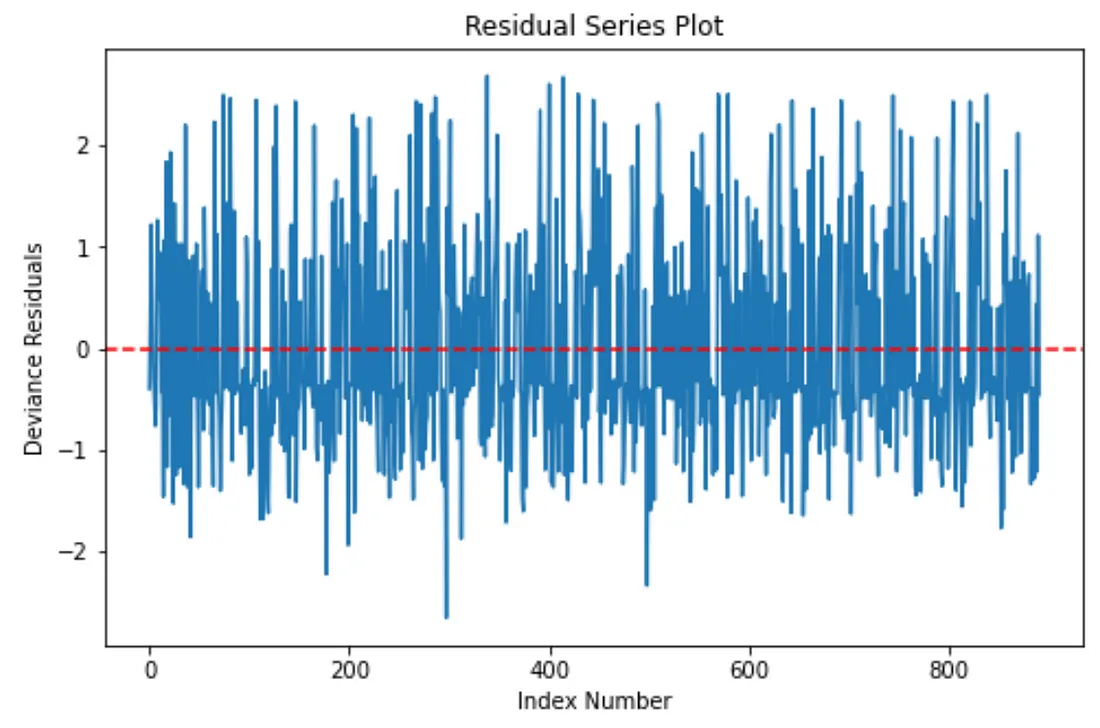

**⚒️ Potential fixes:**
* Add new variables that are currently not present in the model.

### Little to no multicollinearity

Multicollinearity happens when the features have high correlation with each other. This is an assumption that is often overlooked. There is danger in interpreting model coefficients (or feature importance in machine learning models) at the presence of multicollinearity since they lead to wild and unstable estimates. In linear models, beta coefficients cannot be estimated if there is perfect multicollinearity.

**⚠️ Implications when violated:**
- Violation happens when the features are highly correlated with each other.
- Violation leads to wild estimates to the extent that the coefficients may have an opposite direction than they were supposed to have (e.g., have a negative effect on outcome when it's really positive).
- Violation leads to inflated standard errors, and consequently, **misleading p-values and confidence intervals**. Such inflation in the standard errors will not be fixed regardless of how large our sample size is.

**🔎 Detection tools:**
* **Correlation Plot** during EDA
* **Variance Inflation Factor** - measures how much the variance of a given feature is influenced, or inflated, by its interaction with the other features. Extreme violation happens when VIF is above 100. What we want is VIF below 10.

**⚒️ Potential fixes:**
* Dropping variables with high VIF especially if removing them leads to drastically different coefficient estimates.

## 2.2 Interpretation

### Global Interpretation

The interpretation template is the same as in the linear regression. However, this time since the left-hand side is in form of log odds, we first exponentiate the beta coefficient of the feature we wish to interpret, i.e., $e^{\beta_j}$.

If $\beta_j$ in $e^{\beta_j}$ is positive:
* Every unit increase in $x_i$ leads to a change in the odds by a multiplicative factor of  $e^{\beta_j}$.
* Every unit increase in $x_i$ leads to a $(e^{\beta_j}-1)\%$ increase in odds.

If $\beta_j$ in $e^{\beta_j}$ is negative:
* Every unit increase in $x_i$ leads to a change in the odds by a multiplicative factor of  $e^{-\beta_j}$.
* Every unit increase in $x_i$ leads to a $(1-e^{\beta_j})\%$ decrease in odds.

### Local Intepretation
Similar to linear regression, arriving at a local interpretation for a given instance is be as simple as plugging in feature values. The resulting probability is already the likelihood of that datapoint to experience the outcome. If a classification is required, then the data scientist must impose a threshold on these probabilities.

# 3.0 Revisiting Decision Trees
GLMs' weakest strength is its linear design. However, with  decision trees, we can capture the non-linear relationship between the features and the outcome variable, without even having to think about which interaction terms to add!

Recall in ML1 that tree-based models split the data multiple times according to certain cutoff values in the features. At the bottom of the tree, there we get the final predictions of the model.
* If outcome variable is continuous, the average of the outcome is taken for that node.
* If outcome variable is categorical, we employ a majority vote on that node to determine the final classification.

**Advantages:**
* Tree-based models can go beyond linearity.
* It can naturally capture interaction between the features.
* Unlike GLMs, it does not have to distinguish between continuous vs. continuous between 0 and 1 vs. count, etc. Application is only either regression or clasification.

**Disadvantages:**
* The resulting decision tree loses its interpretability as number of features increase.
* The tree is not robust enough. Slight changes to the realization of $\bf{X}$ may drastically change the resulting tree. This is the reason why random forest and other tree-based methods now come in to play.

# References
1. https://jeffmacaluso.github.io/post/LinearRegressionAssumptions/
2. https://www.stat.cmu.edu/~hseltman/309/Book/chapter9.pdf
3. https://www.frontiersin.org/articles/10.3389/fpsyg.2018.02104/full
4. https://thestatsgeek.com/2013/08/07/assumptions-for-linear-regression/
5. https://towardsdatascience.com/central-limit-theorem-70b12a0a68d8
6. https://christophm.github.io/interpretable-ml-book/limo.html
7. https://towardsdatascience.com/assumptions-of-logistic-regression-clearly-explained-44d85a22b290